In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
import itertools
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
mystem = Mystem()
russian_stopwords = stopwords.words("russian")


# FIRST: Preprocessing
def preprocess_text(text):
    # 1. lowercase all words
    # 2. Lemmatize - interpret different forms of the same word as one word
    tokens = mystem.lemmatize(text.lower())
    # 3. Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in russian_stopwords \
              and token != " " \
              and token.strip() not in punctuation]
    text = " ".join(tokens)

    return text

In [ ]:
"""   APPLY PREPROCESSING   """
# data = pd.read_csv('E:/INEVENTZ/DATA/data.csv')
# data['text'] = data['text'].apply(lambda row: preprocess_text(str(row)))
# data.to_csv("E:/INEVENTZ/DATA/data_no_stopwords.csv", index=None, header=True)


In [3]:
data = pd.read_csv('E:/INEVENTZ/DATA/data_no_stopwords.csv')

In [7]:
# Create list of all WORDS in dataset
all_words = [i.split(' ') for i in data["text"]]
all_words = list(itertools.chain.from_iterable(all_words))


# Count length of each sentence in dataset
sentence_lengths = [len(tokens) for tokens in data["text"]]

# Create list of all UNIQUE words
VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

272 words total, with a vocabulary size of 215
Max sentence length is 308


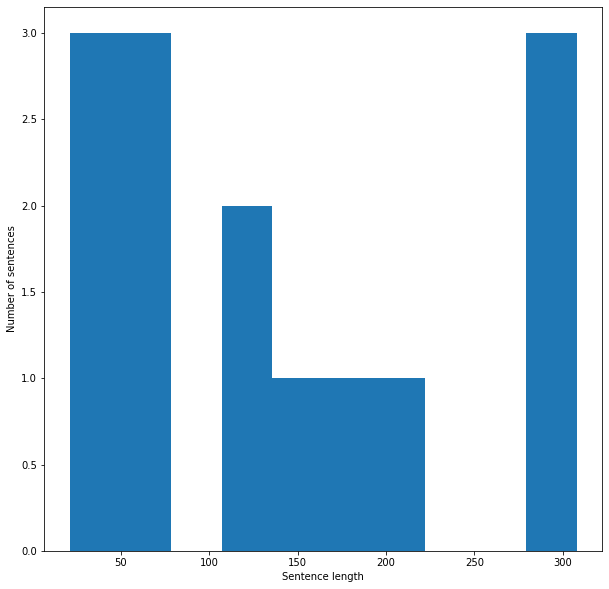

In [8]:
# PLot hist
fig = plt.figure(figsize=(10, 10))
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()


In [17]:
# Create bag of words

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)
    print("EMB: ", emb)
    print("Count_Vectorizer: ", count_vectorizer)
    return emb, count_vectorizer

list_text = data["text"].tolist()
list_labels = data["label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_text, list_labels, test_size=0.2,
                                                                                random_state=40)

In [18]:
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)


EMB:    (0, 22)	1
  (0, 43)	1
  (0, 99)	1
  (0, 7)	1
  (0, 0)	1
  (0, 132)	1
  (0, 9)	1
  (0, 88)	1
  (0, 115)	1
  (0, 75)	1
  (0, 48)	1
  (0, 73)	1
  (0, 18)	1
  (0, 38)	1
  (0, 23)	1
  (0, 28)	1
  (0, 26)	1
  (0, 32)	1
  (0, 17)	1
  (0, 27)	1
  (0, 33)	1
  (0, 34)	1
  (0, 25)	1
  (0, 31)	1
  (0, 11)	1
  :	:
  (10, 135)	1
  (10, 101)	1
  (10, 71)	1
  (10, 118)	1
  (10, 163)	1
  (10, 136)	1
  (10, 81)	1
  (10, 86)	1
  (10, 45)	1
  (10, 74)	1
  (10, 57)	1
  (10, 126)	1
  (10, 70)	1
  (10, 46)	1
  (10, 139)	1
  (10, 68)	1
  (10, 61)	1
  (10, 161)	1
  (10, 97)	1
  (10, 108)	1
  (10, 49)	1
  (10, 72)	1
  (10, 112)	1
  (10, 66)	1
  (10, 144)	1
Count_Vectorizer:  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, tok

In [13]:
from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
#                          multi_class='multinomial', n_jobs=-1, random_state=40)
clf = LogisticRegression()
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)


In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


def get_metrics(y_test, y_predicted):
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                average='weighted')
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                          average='weighted')

    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')

    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1


accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


accuracy = 0.333, precision = 1.000, recall = 0.333, f1 = 0.500


E:\Program_Files\Anaconda3\envs\stepik_mipt\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
